In [1]:
# Imports
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
class KMeans(object):
    """K-Means Clustering Model
    
    Parameters
    ----------        
    data : {array-like, sparse matrix},
    shape = [n_samples, n_features]
        data

    num_clusters : integer
        Number of clusters to cluster the data in
    """
    def __init__(self, data, num_clusters):
        self.data = data
        self.num_clusters = num_clusters
        self.clusters = None
        self.objectives = None
        
    def closest_centroid(self, data):
        """Get the minimim distance from the data to each centroid

        Parameters
        ----------
        data : array-like, shape = [n_features]
            Data point
        
        Returns
        ----------
        min_centroid : Integer
            Closest centroid to the data point
        """
        distances = [np.square(np.linalg.norm(data - self.centroids[k])) for k in range(self.num_clusters)]
        min_centroid = np.argmin(np.array(distances))
        return min_centroid
        
    def assign_clusters(self):
        """Assigns a cluster to every data point
        
        Returns
        ----------
        clusters : array-like, shape = [n_samples]
            Assigned cluster for ever data point
        """
        clusters = np.apply_along_axis(self.closest_centroid, 1, self.data)
        return clusters

    def update_centroids(self, clusters):
        """ Update the vaue of each centroid given the assigned clusters

        Parameters
        ----------
        clusters : array-like, shape = [n_samples]
            Assigned cluster for ever data point
        """
        self.centroids = np.array([self.data[clusters == k].mean(axis = 0) for k in range(self.num_clusters)])

    def calculate_objective(self, clusters):
        """Calculate the k-means objective function value given the clusters

        Parameters
        ----------
        clusters : array-like, shape = [n_samples]
            Assigned cluster for ever data point
        
        Returns
        ----------
        obj : Float
            Value of objective function given the clusters
        """
        obj = sum([np.square(np.linalg.norm(self.data[clusters == k] - self.centroids[k])) for k in range(self.num_clusters)])
        return obj
    
    def find_clusters(self, iterations):
        """ Find the value of the centroid and assign clusters to ever data point

        Parameters
        ----------
        iterations : Integer
            Number of iterations of the k-means algorithm
        """
        self.objectives = []
        self.centroids = np.random.multivariate_normal(np.random.rand(1, 2)[0], [[1, 0], [0, 1]], self.num_clusters)
        for i in range(iterations):
            clusters = self.assign_clusters()
            self.update_centroids(clusters)
            self.objectives.append(self.calculate_objective(clusters))
        self.clusters = clusters
    
    def get_clusters(self):
        """ Get clusters for all data points

        Returns
        ----------
        clusters : array-like, shape = [n_samples]
            Assigned cluster for ever data point
        """
        return self.clusters
    
    def get_objectives(self):
        """ Get clusters for all data points

        Returns
        ----------
        objectives : List[Float]
            Objective function value at every iteration
        """
        return self.objectives

In [3]:
def initialize_data(means, cov, probabilities, num_points):
    """Generate a dataset from a mixture of Gaussians
    
    Parameters
    ----------    
    means: array-like
        Array of means for each gaussian
        
    cov: array-like
        Array of covariances for each gaussian
        
    probabilities: List[Float]
        List of probability weights for each gaussian

    num_points : Integer
        Number of points to generate
    """
    gaussian_counts = Counter(np.random.choice(len(means), num_points, p=probabilities))
    data = np.random.multivariate_normal(means[0], cov, gaussian_counts[0])
    for i in range(1, len(means)):
        data = np.append(data, np.random.multivariate_normal(means[i], cov, gaussian_counts[i]), axis = 0)

    return data

In [4]:
def cluster_range(data, start_cluster, end_cluster, iterations):
    """Run k-means for a range of cluster sizes
    
    Parameters
    ----------    
    data : {array-like, sparse matrix},
    shape = [n_samples, n_features]
        data set
        
    start_cluster: Integer
        Initial number of clusters in range
        
    end_cluster: Integer
        Final number of clusters in range

    iterations : Integer
        Number of iterations of the k-means algorithm
    """
    all_clusters = {}
    for i in range(start_cluster, end_cluster+1):
        kmeans = KMeans(data, i)
        kmeans.find_clusters(iterations)
        all_clusters[i] = [kmeans.get_objectives(), kmeans.get_clusters()]
    
    return all_clusters

Generate 500 observations from a mixture of three Gaussians on $R^2$ with mixing weights π = [0.2, 0.5, 0.3] with the below means and covariances

In [5]:
# Initialize the means, coveriances and mixing weights
means = [[0, 0], [3, 0], [0, 3]]
cov = [[1, 0], [0, 1]]
probabilities = [0.2, 0.5, 0.3]

In [6]:
# Create the data set
data = initialize_data(means, cov, probabilities, 500)

In [7]:
# Run K-means clustering on the data for cluster sizes 2-5
all_clusters = cluster_range(data, 2, 5, 20)

Plot the k-means objective function to get a sense of the ideal number of clusters

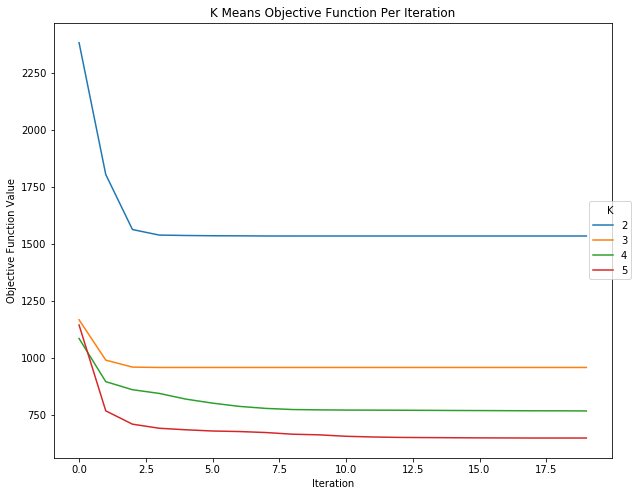

In [8]:
plt.figure(figsize=(10,8))
for i in range(len(all_clusters)):
    plt.plot(list(range(20)), all_clusters[i+2][0], label = str(i+2))
plt.title('K Means Objective Function Per Iteration')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.legend(title = 'K', loc='center left', bbox_to_anchor=(.95, 0.5));

Plot of the 500 data points indicating the cluster of each for the final iteration by color for K = 3.

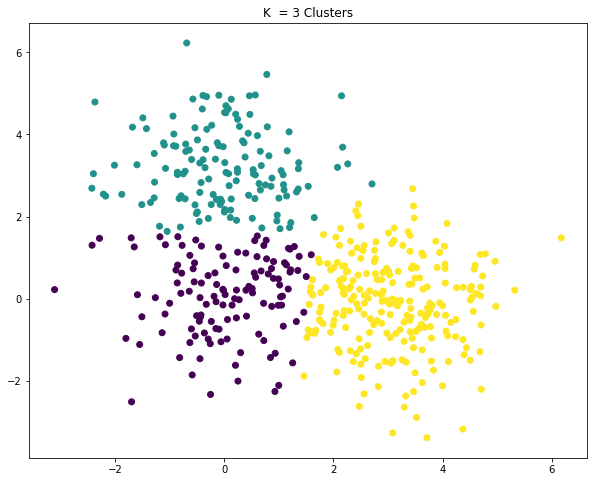

In [9]:
plt.figure(figsize=(10,8))
plt.scatter(data[:,0], data[:,1], c = all_clusters[3][1])
plt.title('K  = 3 Clusters');

Plot of the 500 data points indicating the cluster of each for the final iteration by color for K = 5.

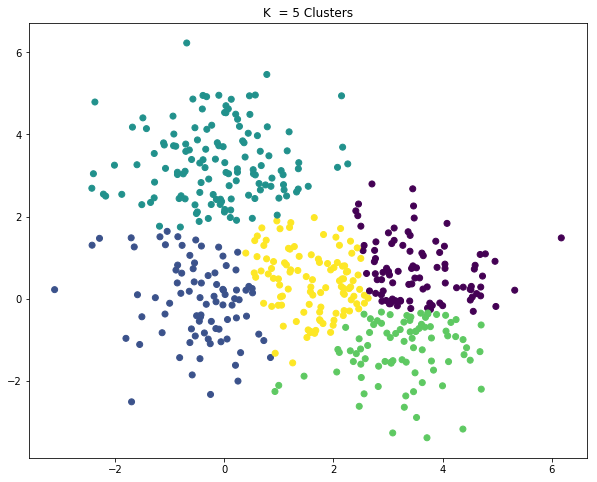

In [10]:
plt.figure(figsize=(10, 8))
plt.scatter(data[:,0], data[:,1], c = all_clusters[5][1])
plt.title('K  = 5 Clusters');